## Task 3: Correlation between news and stock movement

Combine Stock Price Data

In [8]:
import pandas as pd
import os

# Load Financial News Data
news_data = pd.read_csv("../src/data/raw_analysis_ratings.csv")

# Load Stock Price Data
file_paths = [
    "../src/data/AAPL_historical_data.csv",
    "../src/data/AMZN_historical_data.csv",
    "../src/data/GOOG_historical_data.csv",
    "../src/data/META_historical_data.csv",
    "../src/data/MSFT_historical_data.csv",
    "../src/data/NVDA_historical_data.csv",
    "../src/data/TSLA_historical_data.csv"
]

# Combine Stock Price Data
combined_stock_data = pd.DataFrame()
for file_path in file_paths:
    data = pd.read_csv(file_path)
    stock_symbol = os.path.basename(file_path).split('_')[0]
    data['Stock'] = stock_symbol
    combined_stock_data = pd.concat([combined_stock_data, data], ignore_index=True)

# Display the first few rows of each dataset
print(news_data.head())
print(combined_stock_data.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

Normalize Dates: 

In [9]:
# Normalize Dates in News Data
news_data['date'] = pd.to_datetime(news_data['date'], format='ISO8601').dt.date

# Normalize Dates in Stock Data
combined_stock_data['Date'] = pd.to_datetime(combined_stock_data['Date']).dt.date

# Display the first few rows of each dataset after normalization
print(news_data.head())
print(combined_stock_data.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock  
0  2020-06-05     A  
1  2020-06-03     A  
2  2020-05-26     A  
3  2020-05-22     A  
4  2020-05-22     A  
        

Perform Sentiment Analysis: 

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

         date stock Sentiment  
0  2020-06-05     A   neutral  
1  2020-06-03     A   neutral  
2  2020-05-26     A   neutral  
3  2020-05-2

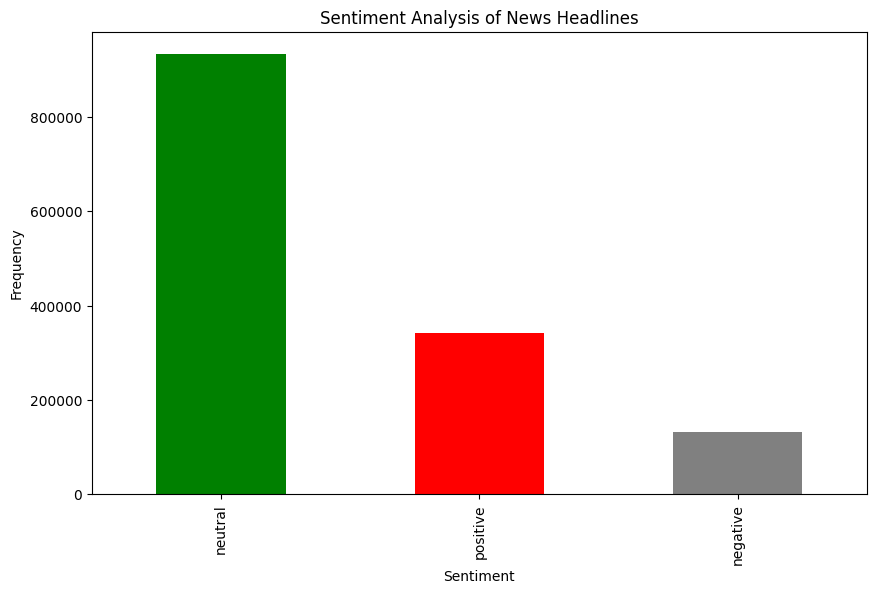

In [14]:
from textblob import TextBlob

# Load Financial News Data
news_data = pd.read_csv("../src/data/raw_analysis_ratings.csv")

# Normalize Dates in News Data
news_data['date'] = pd.to_datetime(news_data['date'], format='ISO8601').dt.date

# Perform Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

news_data['Sentiment'] = news_data['headline'].apply(get_sentiment)

# Display the first few rows with sentiment classification
print(news_data.head())

# Plot Sentiment Analysis Results
sentiment_counts = news_data['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(10, 6), color=['green', 'red', 'gray'])
plt.title('Sentiment Analysis of News Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

Compute Daily Returns: 

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits Stock  Daily_Return  
0        0.0           0.0  AAPL           NaN  
1        0.0           0.0  AAPL     -0.052171  
2        0.0           0.0  AAPL     -0.073398  
3        0.0           0.0  AAPL      0.024751  
4        0.0           0.0  AAPL      0.028992  


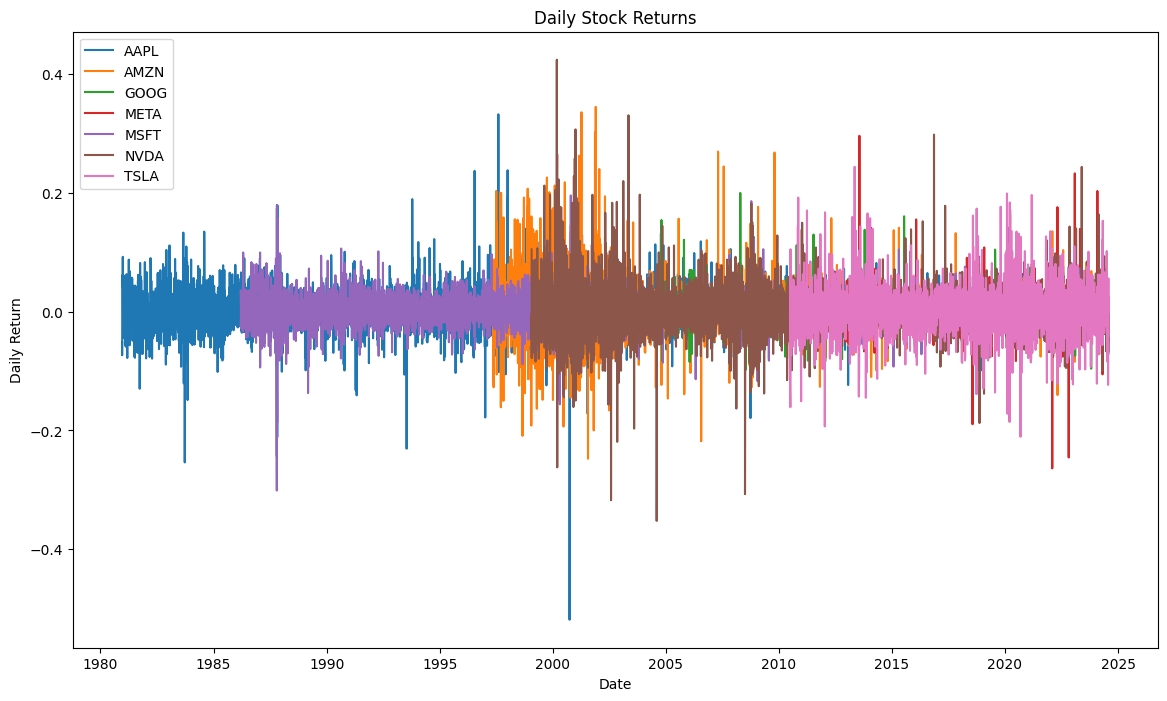

In [15]:
# Combine Stock Price Data
combined_stock_data = pd.DataFrame()
for file_path in file_paths:
    data = pd.read_csv(file_path)
    stock_symbol = os.path.basename(file_path).split('_')[0]
    data['Stock'] = stock_symbol
    combined_stock_data = pd.concat([combined_stock_data, data], ignore_index=True)

# Normalize Dates in Stock Data
combined_stock_data['Date'] = pd.to_datetime(combined_stock_data['Date']).dt.date

# Calculate Daily Stock Returns
combined_stock_data['Daily_Return'] = combined_stock_data.groupby('Stock')['Close'].pct_change()

# Display the first few rows with daily returns
print(combined_stock_data.head())

# Plot Daily Returns for each stock
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for stock_symbol in combined_stock_data['Stock'].unique():
    stock_data = combined_stock_data[combined_stock_data['Stock'] == stock_symbol]
    plt.plot(stock_data['Date'], stock_data['Daily_Return'], label=stock_symbol)

plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

Aggregate Sentiments:

In [27]:
# Perform Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_data['Sentiment'] = news_data['headline'].apply(get_sentiment)

# Aggregate Daily Sentiments
daily_sentiment = news_data.groupby(['date', 'stock'])['Sentiment'].mean().reset_index()

# Display the first few rows of the aggregated sentiment data
print(daily_sentiment.head())


         date stock  Sentiment
0  2009-02-14   NAV        0.0
1  2009-04-27    FT        0.0
2  2009-04-27     Y        0.0
3  2009-04-29     A        0.0
4  2009-05-22    AM        0.0


Positive and Negative Sentiment Correlation

In [29]:
# Combine Stock Price Data
combined_stock_data = pd.DataFrame()
for file_path in file_paths:
    data = pd.read_csv(file_path)
    stock_symbol = os.path.basename(file_path).split('_')[0]
    data['Stock'] = stock_symbol
    combined_stock_data = pd.concat([combined_stock_data, data], ignore_index=True)

# Normalize Dates in Stock Data
combined_stock_data['Date'] = pd.to_datetime(combined_stock_data['Date']).dt.date

# Calculate Daily Stock Returns
combined_stock_data['Daily_Return'] = combined_stock_data.groupby('Stock')['Close'].pct_change()

# Normalize Dates in News Data
news_data['date'] = pd.to_datetime(news_data['date'], format='ISO8601').dt.date

# Perform Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_data['Sentiment'] = news_data['headline'].apply(get_sentiment)

# Filter Positive and Negative Sentiments
positive_sentiment = news_data[news_data['Sentiment'] > 0]
negative_sentiment = news_data[news_data['Sentiment'] < 0]

# Aggregate Daily Sentiments
positive_daily_sentiment = positive_sentiment.groupby(['date', 'stock'])['Sentiment'].mean().reset_index()
negative_daily_sentiment = negative_sentiment.groupby(['date', 'stock'])['Sentiment'].mean().reset_index()

# Merge Sentiment with Stock Data
positive_merged_data = pd.merge(combined_stock_data, positive_daily_sentiment, left_on=['Date', 'Stock'], right_on=['date', 'stock'], how='left')
negative_merged_data = pd.merge(combined_stock_data, negative_daily_sentiment, left_on=['Date', 'Stock'], right_on=['date', 'stock'], how='left')

# Drop rows with missing values
positive_merged_data.dropna(subset=['Daily_Return', 'Sentiment'], inplace=True)
negative_merged_data.dropna(subset=['Daily_Return', 'Sentiment'], inplace=True)

# Calculate Correlation
positive_correlation = positive_merged_data.groupby('Stock').apply(lambda x: x['Daily_Return'].corr(x['Sentiment']))
negative_correlation = negative_merged_data.groupby('Stock').apply(lambda x: x['Daily_Return'].corr(x['Sentiment']))

# Display Correlation
print("Positive Sentiment Correlation with Stock Returns:")
print(positive_correlation)

print("\nNegative Sentiment Correlation with Stock Returns:")
print(negative_correlation)


Positive Sentiment Correlation with Stock Returns:
Stock
AAPL   -0.076480
AMZN   -0.227136
GOOG   -0.009073
NVDA    0.039801
TSLA   -0.004117
dtype: float64

Negative Sentiment Correlation with Stock Returns:
Stock
AAPL    0.080228
AMZN    0.252461
GOOG   -0.010133
NVDA   -0.020178
TSLA   -0.044344
dtype: float64


C:\Users\Abeni\AppData\Local\Temp\ipykernel_12936\3605670479.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positive_correlation = positive_merged_data.groupby('Stock').apply(lambda x: x['Daily_Return'].corr(x['Sentiment']))
C:\Users\Abeni\AppData\Local\Temp\ipykernel_12936\3605670479.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  negative_correlation = negative_merged_data.groupby('Stock').appl

Calculate Correlation

C:\Users\Abeni\AppData\Local\Temp\ipykernel_12936\1506897040.py:54: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation = merged_data.groupby('Stock').apply(lambda x: x['Daily_Return'].corr(x['Sentiment']))


Stock
AAPL    0.158900
AMZN   -0.029749
GOOG    0.056820
NVDA    0.103817
TSLA    0.082690
dtype: float64


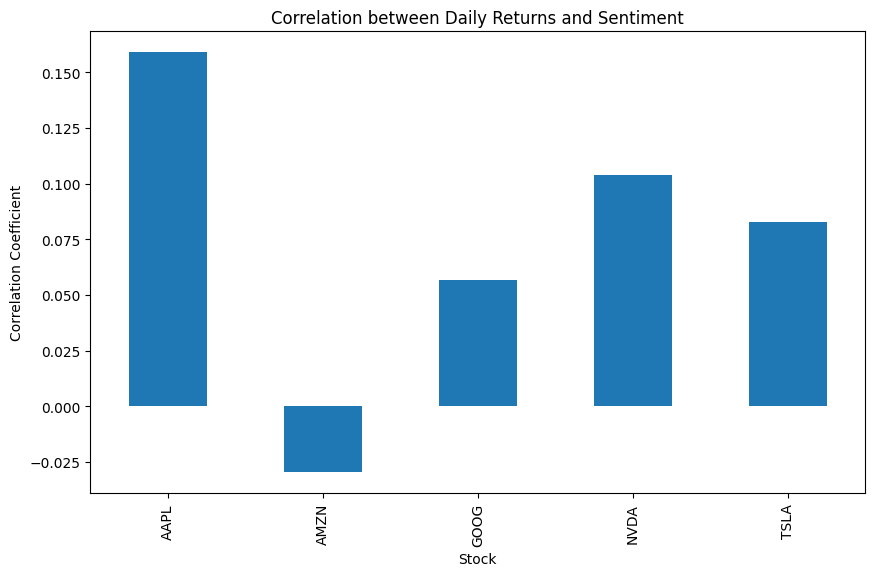

In [32]:
import os
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from datetime import datetime

# Load Financial News Data
news_data = pd.read_csv("../src/data/raw_analysis_ratings.csv")

# Load Stock Price Data
file_paths = [
    "../src/data/AAPL_historical_data.csv",
    "../src/data/AMZN_historical_data.csv",
    "../src/data/GOOG_historical_data.csv",
    "../src/data/META_historical_data.csv",
    "../src/data/MSFT_historical_data.csv",
    "../src/data/NVDA_historical_data.csv",
    "../src/data/TSLA_historical_data.csv"
]

# Combine Stock Price Data
combined_stock_data = pd.DataFrame()
for file_path in file_paths:
    data = pd.read_csv(file_path)
    stock_symbol = os.path.basename(file_path).split('_')[0]
    data['Stock'] = stock_symbol
    combined_stock_data = pd.concat([combined_stock_data, data], ignore_index=True)

# Normalize Dates
news_data['date'] = pd.to_datetime(news_data['date'], format='ISO8601').dt.date
combined_stock_data['Date'] = pd.to_datetime(combined_stock_data['Date']).dt.date

# Perform Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

news_data['Sentiment'] = news_data['headline'].apply(get_sentiment)

# Calculate Daily Stock Returns
combined_stock_data['Daily_Return'] = combined_stock_data.groupby('Stock')['Close'].pct_change()

# Aggregate Sentiments
daily_sentiment = news_data.groupby(['date', 'stock'])['Sentiment'].mean().reset_index()

# Merge Sentiment with Stock Data
merged_data = pd.merge(combined_stock_data, daily_sentiment, left_on=['Date', 'Stock'], right_on=['date', 'stock'], how='left')

# Drop rows with missing values
merged_data.dropna(subset=['Daily_Return', 'Sentiment'], inplace=True)

# Calculate Correlation
correlation = merged_data.groupby('Stock').apply(lambda x: x['Daily_Return'].corr(x['Sentiment']))

# Display Correlation
print(correlation)

# Plot Correlation
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar')
plt.title('Correlation between Daily Returns and Sentiment')
plt.xlabel('Stock')
plt.ylabel('Correlation Coefficient')
plt.show()